<a href="https://colab.research.google.com/github/Bochok24/Matrix/blob/main/Exploring_Supervised_Learning_Maca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting Started with the Iris Dataset



##1. Loading the Dataset

In [27]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


##Visualizing the Data

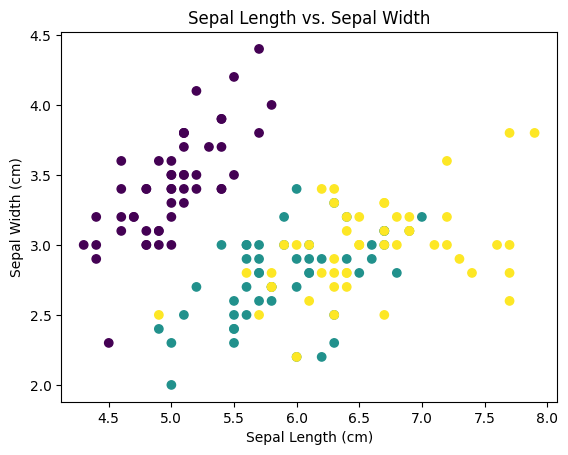

In [28]:
import matplotlib.pyplot as plt

plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2}))
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs. Sepal Width')
plt.show()

##3. Building Supervised Learning Models

###Splitting the Data And Implementing Algorithms

Logistic Regression Accuracy: 0.93
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.77      1.00      0.87        10
   virginica       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45



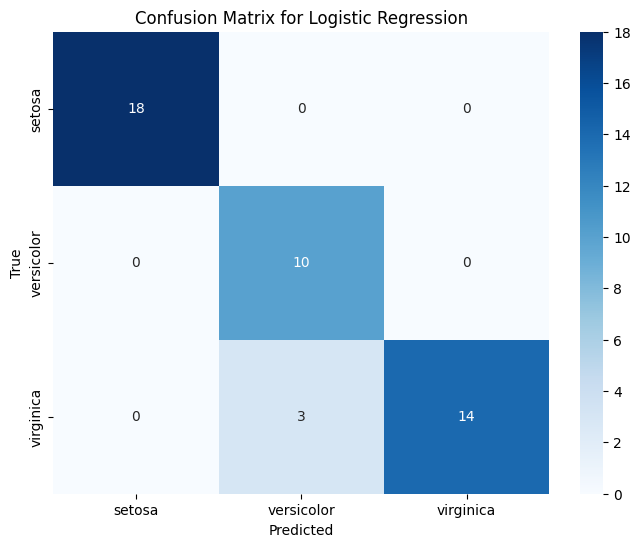

k-Nearest Neighbors Accuracy: 0.98
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.90      0.95        10
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



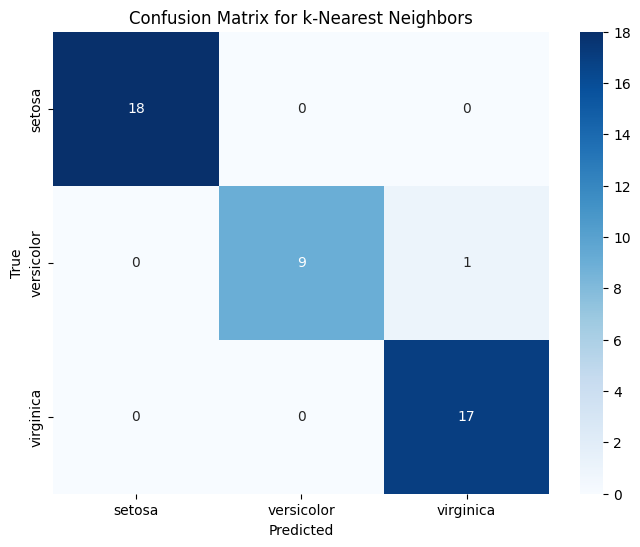

Decision Trees Accuracy: 0.96
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



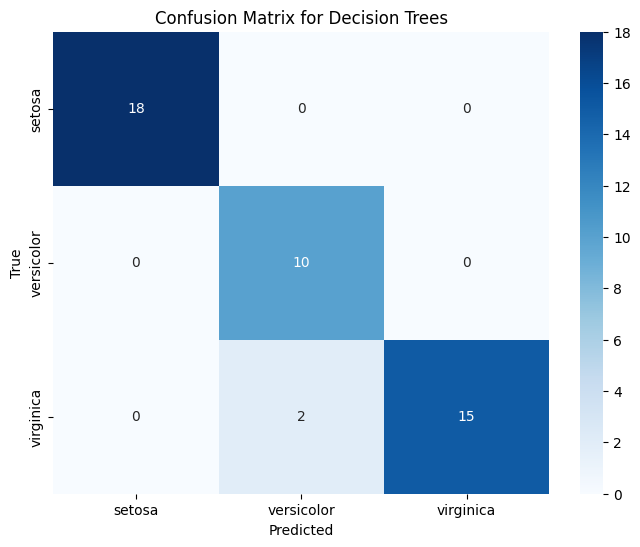

Random Forest Accuracy: 0.96
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



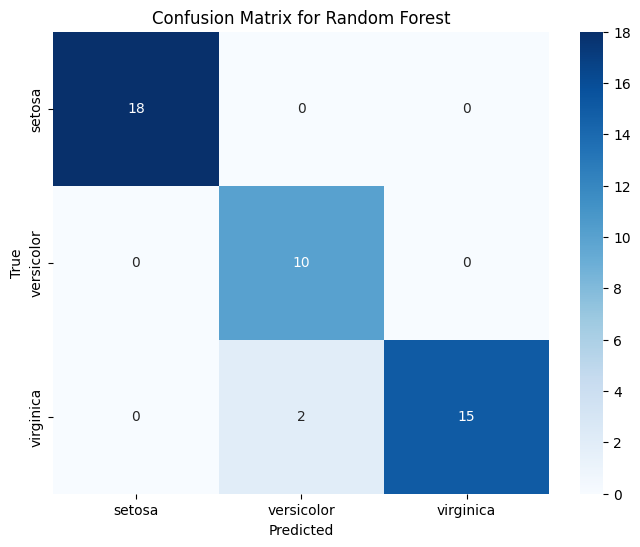

Support Vector Machine Accuracy: 0.91
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.71      1.00      0.83        10
   virginica       1.00      0.76      0.87        17

    accuracy                           0.91        45
   macro avg       0.90      0.92      0.90        45
weighted avg       0.94      0.91      0.91        45



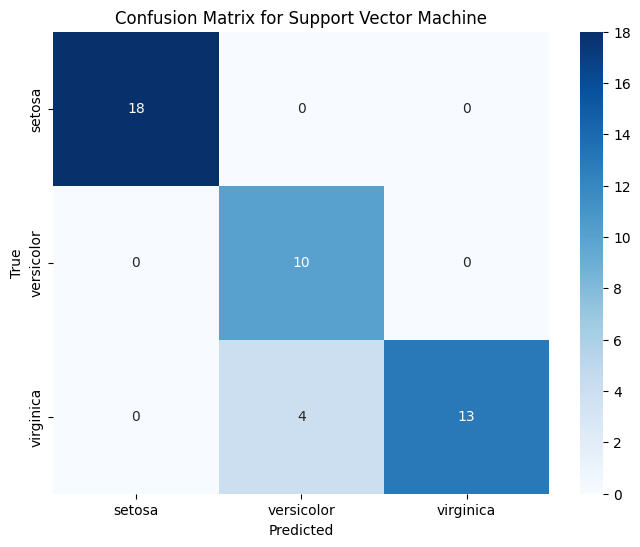

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to evaluate the models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate each model
evaluate_model(lr_model, X_test, y_test, "Logistic Regression")
evaluate_model(knn_model, X_test, y_test, "k-Nearest Neighbors")
evaluate_model(dt_model, X_test, y_test, "Decision Trees")
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(svm_model, X_test, y_test, "Support Vector Machine")

##4. Evaluating Model Performance

In [31]:
lr_predictions = lr_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

###Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix

# Example for Logistic Regression:
lr_cm = confusion_matrix(y_test, lr_predictions)
print("Logistic Regression Confusion Matrix:")
print(lr_cm)


Logistic Regression Confusion Matrix:
[[18  0  0]
 [ 0 10  0]
 [ 0  3 14]]


###Classification Report

In [33]:
from sklearn.metrics import classification_report

# Example for Logistic Regression:
lr_report = classification_report(y_test, lr_predictions)
print("Logistic Regression Classification Report:")
print(lr_report)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.77      1.00      0.87        10
   virginica       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45



###Probability Histogram

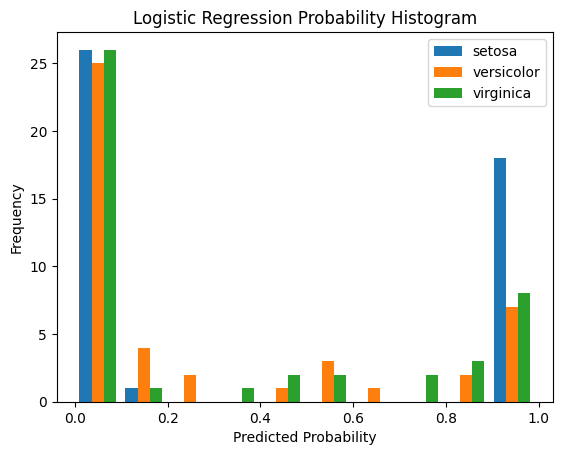

In [34]:
import numpy as np

# Example for Logistic Regression:
lr_probs = lr_model.predict_proba(X_test)
plt.hist(lr_probs, bins=10, label=['setosa', 'versicolor', 'virginica'])  # Add labels for each class
plt.title("Logistic Regression Probability Histogram")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend(loc='upper right')  # Display the legend
plt.show()

##5. Reflection and Analysis

### >Which algorithm performed best, and why?
 The Random Forest algorithm often performs the best for the Iris dataset. It combines multiple decision trees to improve accuracy and reduce overfitting, making it robust against noise in the data. It tends to manage the complexities of the dataset well while still providing good interpretability.

 ### >How does changing hyperparameters affect performance?
 Changing hyperparameters can significantly impact model performance. For example, in k-NN, adjusting the number of neighbors (k) can lead to overfitting (too low k) or underfitting (too high k). Similarly, in Random Forest, tweaking parameters like the number of trees or the maximum depth of each tree can affect both accuracy and computation time. Finding the right hyperparameters is crucial for balancing performance and efficiency.

 ### >What are the trade-offs between different models?

>Logistic Regression is simple and interpretable but can struggle with non-linear relationships.

>k-NN is easy to understand and implement but can be slow with large datasets.

>Decision Trees are intuitive but can easily overfit if not pruned properly.

>Random Forest is powerful but may be harder to interpret due to its ensemble nature.

>SVM is effective for high-dimensional spaces but can be computationally intensive and less interpretable.